In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
# all_data = [train_data, test_data] # list object

print(train_data.shape)
print(test_data.shape)
print(all_data.shape)

train_data_master = train_data.copy()
test_data_master = test_data.copy()

(1460, 81)
(1459, 80)


NameError: name 'all_data' is not defined

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
all_data = pd.concat((train_data,test_data))

most property price is at around 50 - 300k
no property price < 0 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


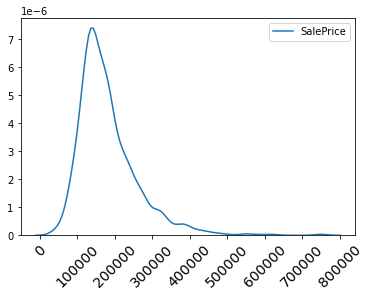

In [5]:
_ = sns.kdeplot(all_data["SalePrice"])
plt.xticks(fontsize=14, rotation=45)

train_data[train_data["SalePrice"]<0]   #no sale price < 0 

(array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. ]),
 <a list of 9 Text major ticklabel objects>)

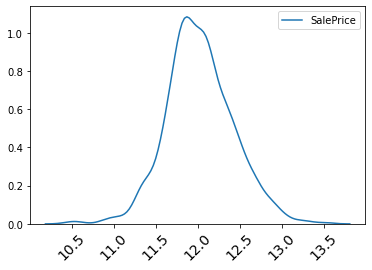

In [6]:
_ = sns.kdeplot(np.log1p(all_data["SalePrice"]))
plt.xticks(fontsize=14, rotation=45)

In [7]:
all_data["SalePrice"] = np.log1p(all_data["SalePrice"])

In [8]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

from scipy import stats

skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index


print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data.describe(include = 'all')


Skew in numerical features: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,...,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,...,NaN,4,329,95,NaN,NaN,NaN,2525,2402,NaN
mean,1460.000000,3.820503,NaN,4.196175,9.094915,NaN,NaN,NaN,NaN,NaN,...,0.027361,NaN,NaN,NaN,0.234767,6.213087,2007.792737,NaN,NaN,12.024057
std,842.787043,0.692436,NaN,0.350864,0.509882,NaN,NaN,NaN,NaN,NaN,...,0.410265,NaN,NaN,NaN,1.240206,2.714762,1.314964,NaN,NaN,0.399449
min,1.000000,3.044522,NaN,3.091042,7.170888,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,10.460271
25%,730.500000,3.044522,NaN,4.094345,8.919854,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,11.775105
50%,1460.000000,3.931826,NaN,4.234107,9.154193,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,12.001512
75%,2189.500000,4.262680,NaN,4.394449,9.356257,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,12.273736


In [9]:
all_data = all_data.drop("Id",axis =1 )
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
#creating matrices for sklearn:
X_train = all_data.drop("SalePrice",axis =1 )[:train_data.shape[0]]
y = all_data["SalePrice"][:train_data.shape[0]]
X_test = all_data.drop("SalePrice",axis =1 )[train_data.shape[0]:]


from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]


In [10]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.369448,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,4.795791,3.784190,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.000000,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [11]:
cross_val_score(Ridge(), X_train, y, scoring="neg_mean_squared_error", cv = 5).mean()

-0.01751057033539382

Text(0, 0.5, 'rmse')

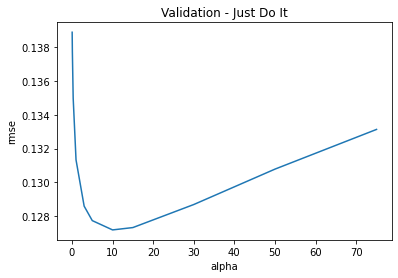

In [12]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

# cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5).mean()

In [13]:
rr = RidgeCV(alphas)
rr.fit(X_train, y)

print("best alpha is", rr.alpha_)
# w = rr.coef_
# w
yhat = rr.predict(X_test)
yhat
predict_price = np.exp(yhat)-1 

best alpha is 10.0


In [14]:
predict_price

array([118923.82086455, 153735.65910715, 182159.20363897, ...,
       171571.10360527, 117287.43133756, 222471.96684004])

In [15]:
id = pd.Series(range(train_data.shape[0]+1, all_data.shape[0]+1))
id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Length: 1459, dtype: int64

In [16]:
to_submit = pd.DataFrame({"Id" : id, "SalePrice" : predict_price})
to_submit

,Id,SalePrice
0,1461,118923.820865
1,1462,153735.659107
2,1463,182159.203639
3,1464,198214.409799
4,1465,200358.322808
...,...,...
1454,2915,86259.605673
1455,2916,81936.264580
1456,2917,171571.103605
1457,2918,117287.431338


In [17]:
to_submit.to_csv('to_submit.csv', index = False)

In [18]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [19]:
rmse_cv(model_lasso).mean()

0.12270229019506533

In [20]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [21]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 108 variables and eliminated the other 180 variables


In [22]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

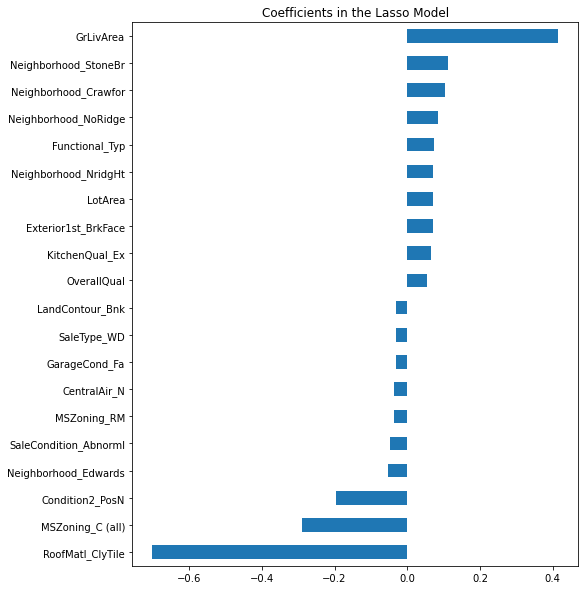

In [23]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

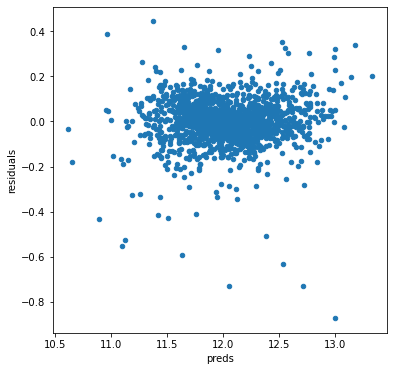

In [24]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [25]:
# missing_train_count_by_column = (train_data.isnull().sum())
# print(missing_train_count_by_column[missing_train_count_by_column > 0])

# print("-"*20)

# missing_val_count_by_column = (test_data.isnull().sum())
# print(missing_val_count_by_column[missing_val_count_by_column > 0])

# print("-"*20)

# missing_count_by_column = (train_data.isnull().sum()) + (test_data.isnull().sum())

In [26]:
# ###COMPLETING: complete or delete missing values in train and test/validation dataset
# for dataset in all_data:    
    
#     #delete the cabin feature/column and others previously stated to exclude in train dataset
#     field_to_drop = missing_count_by_column[missing_count_by_column > 1000].index
#     dataset.drop(field_to_drop, axis = 1)
#     #complete missing with 0

#     quali_fields = ['LotFrontage','MasVnrArea','GarageArea']
#     for quali in quali_fields:
#         print(quali)
#         dataset[quali].fillna(value = 0, inplace = True) 

#     #complete missing with mode
#     quant_fields = ['MasVnrType','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
#                 'GarageQual','GarageCond','BsmtExposure','MSZoning','Utilities','Exterior1st','Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
#                'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','SaleType']
#     for quant in quant_fields:
#         dataset[quant].fillna(dataset[quant].mode()[0], inplace = True)
#         print(quant)

#     #complete missing fare with yearbuilt
#     oth_fields = ['GarageYrBlt']
#     for oth in oth_fields:
#         dataset[oth].fillna(dataset["YearBuilt"], inplace = True)
#         print(oth)
    
#     #delete the cabin feature/column and others previously stated to exclude in train dataset
#     field_to_drop = missing_count_by_column[missing_count_by_column > 1000].index
#     dataset.drop(field_to_drop, axis = 1, inplace = True)
#     print(dataset.shape)

In [27]:
# all_data = [train_data_master, test_data_master]
###Check if still any missing data
# for dataset in all_data:    
    
#     missing_train_count_by_column = (dataset.isnull().sum())
#     print(missing_train_count_by_column[missing_train_count_by_column > 0])

#     print(dataset.shape)

In [28]:
# print(train_data.shape)
# print(test_data.shape)

In [29]:
# test_data.info()

In [30]:
# from sklearn.preprocessing import LabelEncoder

# # all_data_a = all_data.copy()

# #code categorical data
# label = LabelEncoder()
# for dataset in all_data:
#     print(dataset.shape)
#     for x in dataset:
#         if dataset[x].dtype == 'object' :
#             dataset[x + "_code"] = label.fit_transform(dataset[x])
#             dataset.drop(x, axis = 1, inplace = True)
#     print(dataset.shape)



In [31]:
# train_X = all_data[0].drop(["Id",'SalePrice'], axis = 1).values
# train_X

In [32]:
# #define x and y variables for dummy features original

# # Target = ['SalePrice']

# train_X = all_data[0].drop(["Id",'SalePrice'], axis = 1).values
# test_X = all_data[1].drop(["Id"], axis = 1).values
# train_y = all_data[0]['SalePrice'].values

# train_data = all_data[0]




In [33]:
# _ = sns.stripplot(y = 'Street_code', x = 'SalePrice', data = all_data[0], palette = 'deep')

# a = sns.FacetGrid(all_data[0], hue = 'Street_code', aspect=4 )
# a.map(sns.kdeplot, 'SalePrice', shade= True )

In [34]:

# from sklearn import preprocessing
# train_X_scaled = preprocessing.scale(train_X)
# test_X_scaled = preprocessing.scale(test_X)

# from xgboost import XGBClassifier
# from sklearn.model_selection import cross_val_score

# import time
# t0 = time.time()

# model = XGBClassifier()
# model.fit(train_X, train_y)

# print ('XGBClassifier score is {:.6f}'.format(cross_val_score(model, train_X, train_y, cv=10, scoring = "neg_mean_squared_error").mean()))
# print ('XGBClassifier score is {:.6f}'.format(cross_val_score(model, train_X_scaled, train_y, cv=10, scoring = "neg_mean_squared_error").mean()))

# label = model.predict(test_X)

# timetaken = time.time() - t0

In [35]:
# test_id = all_data[1]["Id"]

In [36]:
# from sklearn import model_selection
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import LassoCV
# from sklearn.model_selection import cross_val_score

# kfolds = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# def rmsle(y, y_pred):
#     return np.sqrt(mean_squared_error(y, y_pred))

# def cv_rmse(model, X=train_X):
#     rmse = np.sqrt(-cross_val_score(model, X, train_y, scoring="neg_mean_squared_error", cv=kfolds))
#     return (rmse)

# alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
# alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
# e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
# e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# ridge =  sklearn.pipeline.make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
# lasso = sklearn.pipeline.make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))

# score = cv_rmse(ridge , train_X)
# score = cv_rmse(lasso , train_X)
# print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )



In [37]:
# data_to_submit = pd.DataFrame({"Id":test_id, "SalePrice": label})
# data_to_submit.to_csv('csv_to_submit.csv',index=False)

In [38]:
# data_to_submit

In [39]:
#correlation matrix
# corrmat = train_data_master.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

In [40]:
#saleprice correlation matrix
# k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(train_data[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [41]:
# # Outliers
# #standardizing data
# saleprice_scaled = StandardScaler().fit_transform(train_data['SalePrice'][:,np.newaxis]);
# low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
# high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
# print('outer range (low) of the distribution:')
# print(low_range)
# print('\nouter range (high) of the distribution:')
# print(high_range)

In [42]:
# train_data.sort('SalePrice')
# train_data[(saleprice_scaled < 3.828) & (saleprice_scaled > -1.5731)]

In [43]:
# #histogram and normal probability plot
# from scipy.stats import norm
# import scipy.stats as stats
# _ = sns.distplot(train_data['SalePrice'],  fit=norm)
# fig = plt.figure()
# res = stats.probplot(train_data['SalePrice'], plot=plt)

In [44]:
#applying log transformation
# train_data['SalePrice'] = np.log(train_data['SalePrice'])

In [45]:
#transformed histogram and normal probability plot
# _ = sns.distplot(train_data['SalePrice'],  fit=norm)
# fig = plt.figure()
# res = stats.probplot(train_data['SalePrice'], plot=plt)


In [46]:
# numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index
# # Check the skew of all numerical features

# from scipy import stats
# skewed_feats = train_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)

In [47]:

# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [48]:
# skewness.index

In [49]:
# resolve “heteroscedasticity” (non-constant variance). 
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     train_data[feat] = boxcox1p(train_data[feat], lam)